# Using Pelita with Numpy and Matplotlib

In [31]:
import utils 
import pelita as pl
from matplotlib import pyplot as plt
import numpy as np

Get a random layout

In [32]:
layout_str = pl.layout.get_random_layout("normal_without_dead_ends")[1]
layout_str

'################################\n#  ... #     . ##  .     .    3#\n# .#   . .    .  . ####### ## 1#\n#    # #######    .  #.    #   #\n# .#        .      # # ... #   #\n# ## ########  ##  # .     # # #\n#   .  .    #  ## .###### ##.# #\n# .  ####.#      ..#  .  .# .  #\n#  . #.  .  #..      #.####  . #\n# #.## ######. ##  #    .  .   #\n# # #     . #  ##  ######## ## #\n#   # ... # #      .        #. #\n#   #    .#  .    ####### #    #\n#0 ## ####### .  .    . .   #. #\n#2    .     .  ## .     # ...  #\n################################\n'

Convert it to a "user" layout

In [33]:

layout_str=layout_str.replace('1', 'E')
layout_str=layout_str.replace('3', 'E')
layout_str=layout_str.replace('2', '1')
layout_str

'################################\n#  ... #     . ##  .     .    E#\n# .#   . .    .  . ####### ## E#\n#    # #######    .  #.    #   #\n# .#        .      # # ... #   #\n# ## ########  ##  # .     # # #\n#   .  .    #  ## .###### ##.# #\n# .  ####.#      ..#  .  .# .  #\n#  . #.  .  #..      #.####  . #\n# #.## ######. ##  #    .  .   #\n# # #     . #  ##  ######## ## #\n#   # ... # #      .        #. #\n#   #    .#  .    ####### #    #\n#0 ## ####### .  .    . .   #. #\n#1    .     .  ## .     # ...  #\n################################\n'

Set up a test game to get a bot object

In [34]:
bot = pl.utils.setup_test_game(layout=layout_str, is_blue=True)

We can use pyplot to visualize the game state. You can use `plt.scatter()` to add points to a plot. Watch out though, scatter takes a list of x and a list of y coordinates, not a list of (x,y) tuples.

The `draw_game_elements` function in `utils` gets the information about food, bot positions, and wall positions from the bot object and adds them to a pyplot.

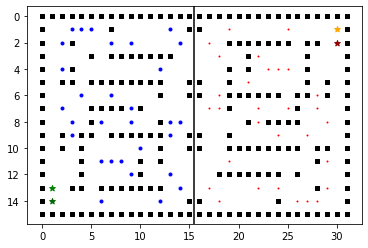

In [35]:
fig, ax = plt.subplots()
ax = utils.draw_game_elements(bot, ax)

You can also use numpy matrices. Be aware that the indexing of numpy matrices, works by \[row,column] and not by \[x,y] coordinates. 

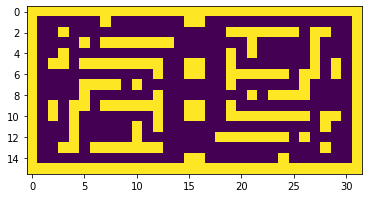

In [36]:
walls = utils.make_wall_matrix(bot)
fig, ax = plt.subplots()
ax.imshow(walls)

Numpy matrices can be shown underneath a scatter plot.

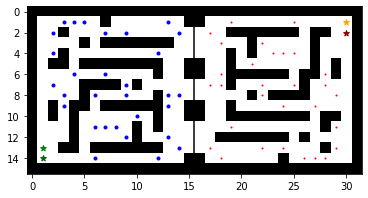

In [37]:
fig, ax = plt.subplots()
ax.imshow(walls, cmap="binary")
ax = utils.draw_game_elements(bot, ax)

This might also come in handy when you are looking at possible next moves. For example you could visualize your bot's legal moves like this:

In [38]:
maze_width = max([x for x, y in bot.walls])+1
maze_height = max([y for x, y in bot.walls])+1
mat = np.zeros((maze_height, maze_width))

In [39]:
mat = utils.replace_coords_in_matrix(mat, bot.legal_positions, 1)

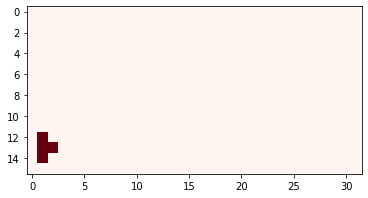

In [40]:
fig, ax = plt.subplots()
ax.imshow(mat, cmap="Reds")

And then add the game elements on top of the matrix:

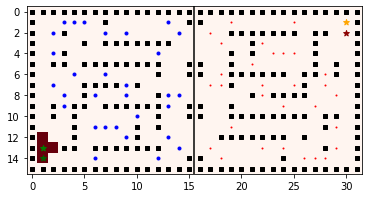

In [41]:
fig, ax = plt.subplots()
ax.imshow(mat, cmap="Reds")
ax = utils.draw_game_elements(bot, ax)